# Лабораторная работа 3
Выполнил студент группы М8О-401Б-20 Зайцев Кирилл

## Оценка стоимости бриллиантов
Я взял датасет, в котором хранится информация о бриллиантах различной стоимости. В качестве целевой переменной выступает их стоимость. Необходимо построить модель, которая будет её прогнозировать

Подключим необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diamonds.csv")

Посмотрим на наш датасет:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Пропусков нет, это очень хорошо

([<matplotlib.patches.Wedge at 0x1df9fa6f010>,
 [Text(0.8705587096075125, 0.6724042929120121, 'G'),
  Text(-0.3409543646615483, 1.0458250911209963, 'E'),
  Text(-1.0908179126209676, 0.1418318776059718, 'F'),
  Text(-0.6750378125021355, -0.8685182506385988, 'H'),
  Text(0.2374058947478484, -1.074075621704065, 'D'),
  Text(0.8804103450797554, -0.6594525185914043, 'I'),
  Text(1.0853220148169267, -0.17909808528771903, 'J')],
 [Text(0.4748502052404613, 0.36676597795200655, '20.9%'),
  Text(-0.18597510799720818, 0.5704500497023616, '18.2%'),
  Text(-0.5949915887023459, 0.07736284233053006, '17.7%'),
  Text(-0.36820244318298295, -0.4737372276210538, '15.4%'),
  Text(0.1294941244079173, -0.585859430020399, '12.6%'),
  Text(0.4802238245889574, -0.3597013737771296, '10.1%'),
  Text(0.5919938262637781, -0.0976898647023922, '5.2%')])

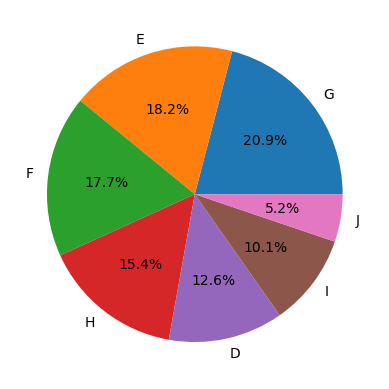

In [7]:
plt.pie(df.color.value_counts(), 
        labels = ["G", "E", "F", "H", "D", "I", "J"], 
        autopct = '%1.1f%%')

Есть незначительный дисбаланс, класса J довольно мало по сравнению с классом G

Теперь посмотрим на другие категориальные признаки

Text(0.5, 1.0, 'Count of cut')

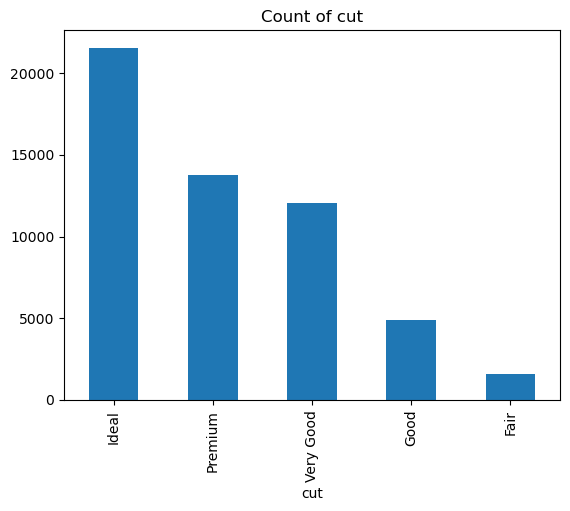

In [8]:
df["cut"].value_counts().plot(kind='bar')
plt.title('Count of cut')

Text(0.5, 1.0, 'Count of clartiy')

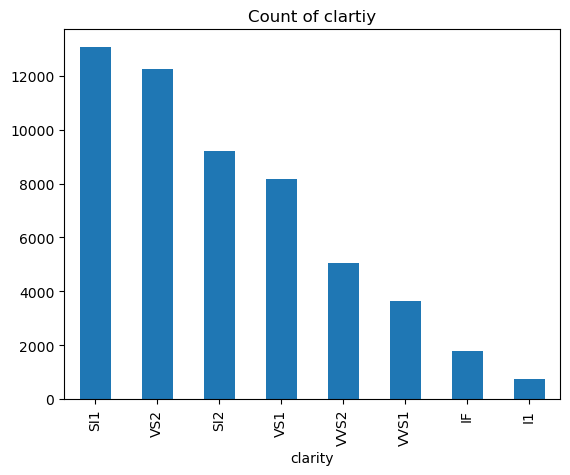

In [9]:
df["clarity"].value_counts().plot(kind='bar')
plt.title('Count of clartiy')

Теперь посмотрим, какие количественные признаки сильнее всего корреллируют с таргетом:

<Axes: >

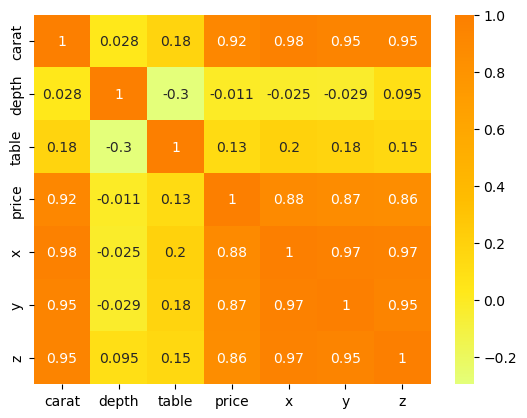

In [10]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='Wistia', annot=True)

Сильнее всего влияние на стоимость оказывают размеры и число карат 

Теперь попробуем модель линейной регрессии для прогнозирования цены:

In [11]:
y = df['price']
X = df.drop(columns = "price")

In [12]:
numeric_data = X.select_dtypes(np.number)
numeric_features = numeric_data.columns
numeric_features

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [13]:
categorical_data = X.select_dtypes(object)
categorical_features = categorical_data.columns
categorical_features

Index(['cut', 'color', 'clarity'], dtype='object')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

## Метрики качества
В качестве метрики качества лучше всего рассматривать MAE, потому что MAE очень хорошо интерпретируем для цены, т.е. мы получаем ошибку в рублях. Это можно легко интепретировать для людей, которые не разбираются в ML. Если бы взяли MSE, то ошибка была бы в рублях в квадрате, а это никак нельзя адекватно интерпретировать.

## Оценка константным предиктором

In [15]:
y_pred = np.array([y_test.mean() for i in range(y_test.shape[0])])
y_pred

array([3957.81108639, 3957.81108639, 3957.81108639, ..., 3957.81108639,
       3957.81108639, 3957.81108639])

In [16]:
print(mean_absolute_error(y_test, y_pred))

3050.373603809228


Средняя ошибка составила 3023 денежных единиц. Результат оставляет желать лучшего

## Линейная регрессия
Теперь обучим модель линейной регрессии и посмотрим на результат

In [17]:
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_features),
    ('scaler', StandardScaler(), numeric_features)
])

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
print(mean_absolute_error(y_test, y_pred))

733.535595105673


Ошибка составила всего 737 денежные единицы. Это ощутимое улучшение качества. Теперь попробуем реализовать линейную регрессию самостоятельно:

In [20]:
class LinearReg:
    @staticmethod
    def mse(y_true, y_pred):
        loss = 0
        for i in range(len(y_true)):
            y = y_true[i]
            pred = y_pred[i]
            loss += (y-pred)**2
        loss /= len(y_true)
        return loss
    
    def __init__(self, lr = 0.01, iters = 2000):
        self.lr = lr
        self.iters = iters
        self.w = None
        self.b = None
        
    def fit(self, X_train, y_train):
        samples, features = X_train.shape
        self.w = np.zeros(features)
        self.b = 0
        
        for _ in range(self.iters):
            preds = np.dot(X_train, self.w) + self.b
            
            dw = (1 / samples) * np.dot(X_train.T, (preds - y_train))
            db = (1 / samples) * np.sum(preds-y_train)
            
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
    def predict(self, X_test):
        preds = np.dot(X_test, self.w) + self.b
        return preds

In [21]:
model2 = LinearReg()
model2.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [22]:
print(mean_absolute_error(y_test, y_preds))

733.535595105673


Результат получился похожим на то, что получилось с использованием sci-kit learn

## Вывод

В ходе лабораторной работы я научился реализовывать линейную регрессию, сравнил полученную мною модель с реализацией из библиотеки sci-kit learn, результат получился довольно неплохим, точность по сравнению с константным предиктором возросла существенно

# Лабораторная 4

## Деревья решений и ансамбли

Теперь для решения задачи классификации попробуем применить методы, основанные на деревьях решений. Сперва попробуем составить дерево решения, затем используем ансамбли: случайный лес и градиентный бустинг на деревьях.

Ниже приведена реализация решающего дерева. На нашей задаче, т.к. данных слишком много, а признаковое пространство имеет большую размерность, то обучение дерева будет очень долгим. Поэтому продемонстрируем, как работает решающее дерево на игрушечном примере

In [23]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        self.value = value

In [24]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["var_red"]>0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_var_red = -float("inf")
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):

        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

In [25]:
X_tree = X_train
Y_tree = y_train.values.reshape(-1,1)
DT = DecisionTree(min_samples_split=3, max_depth=3)
DT.fit(X_tree, Y_tree)
y_preds = DT.predict(X_test)

In [26]:
print(mean_absolute_error(y_test, y_preds))

701.3466988576564


Выведем полученное дерево.

In [27]:
DT.print_tree()

X_20 <= 0.40585955102424254 ? 9643006.53336967
 left:X_24 <= -0.17786641963010102 ? 820528.7403646073
  left:X_20 <= -0.7340099334128147 ? 172096.30372966576
    left:X_23 <= -0.9907310722095612 ? 14564.718014204074
        left:699.7532385466035
        right:959.7848596410493
    right:X_19 <= 0.0 ? 25244.49668123643
        left:1624.8110236220473
        right:2132.597037037037
  right:X_20 <= 0.19477260946182454 ? 295745.3896409085
    left:X_24 <= -0.012435262174797559 ? 38742.5357434164
        left:2455.6776384535005
        right:2872.8747702809137
    right:X_12 <= 0.0 ? 85126.40347336035
        left:3998.568590350047
        right:2142.6545454545453
 right:X_24 <= 1.2674794823478175 ? 8233075.0936975125
  left:X_15 <= 0.0 ? 762071.3841859028
    left:X_14 <= 0.0 ? 906423.7240300435
        left:7372.867303393619
        right:5389.697221219776
    right:X_20 <= 0.8280334341490785 ? 345037.2996769146
        left:4312.332825976661
        right:5646.6941678520625
  right:X_2

Качество модели улучшилось, т.к. дерево может строить нелинейные зависимости, а кусочно линейные

Теперь посмотрим на качество дерева, реализованного в sci-kit learn

In [28]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
y_preds = DTR.predict(X_test)

In [29]:
print(mean_absolute_error(y_test, y_preds))

360.6220800889878


Качество заметно стало лучше. Дефолтные параметры модели из sci-kit learn лучше подходят под задачу. Если бы наше дерево было глубже, то качество было бы лучше, но моя имплементация модели работает медленно, даже не смотря на небольшую глубину дерева

## Случайный лес

In [56]:
class RandomForest:
    def __init__(self, n_estimators = 20, max_depth = 20, min_samples_split = 2, n_features = None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []
        
    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth = self.max_depth, 
                                          min_samples_split = self.min_samples_split)
            tree.fit(X, y)
            self.trees.append(tree)
            
    @staticmethod
    def _bootstraping(X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]
    
    @staticmethod
    def _mean_answer(y):
        mean = np.mean(y)
        return mean
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._mean_answer(pred) for pred in tree_preds])
        return predictions

In [58]:
RF = RandomForest()
RF.fit(X_train, y_train)
y_preds = RF.predict(X_test)

In [59]:
print(mean_absolute_error(y_test, y_preds))

338.69141378706223


Random forest дал неплохое улучшение результата. Теперь воспользуемся Random Forest из библиотеки sci-kit learn:

In [61]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
y_preds = RFR.predict(X_test)

In [62]:
print(mean_absolute_error(y_test, y_preds))

266.01893007037506


Качество стало ещё лучше. Видимо, дефолтные параметры Random Forest из sklearn лучше подходят для нашей задачи

## Градиентный бустинг

In [63]:
from scipy.optimize import minimize

class GradientBoostingMachine():
    def __init__(self, n_trees, learning_rate=0.1, max_depth=1):
        self.n_trees=n_trees; 
        self.learning_rate=learning_rate
        self.max_depth=max_depth;
    
    def fit(self, X, y, objective):
        self.trees = []
        self.base_prediction = self._get_optimal_base_value(y, objective.loss)
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        for _ in range(self.n_trees):
            pseudo_residuals = objective.negative_gradient(y, current_predictions)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, pseudo_residuals)
            self._update_terminal_nodes(tree, X, y, current_predictions, objective.loss)
            current_predictions += self.learning_rate * tree.predict(X)
            self.trees.append(tree)
     
    def _get_optimal_base_value(self, y, loss):
        fun = lambda c: loss(y, c)
        c0 = y.mean()
        return minimize(fun=fun, x0=c0).x[0]
        
    def _update_terminal_nodes(self, tree, X, y, current_predictions, loss):
        leaf_nodes = np.nonzero(tree.tree_.children_left == -1)[0]
        leaf_node_for_each_sample = tree.apply(X)
        for leaf in leaf_nodes:
            samples_in_this_leaf = np.where(leaf_node_for_each_sample == leaf)[0]
            y_in_leaf = y.take(samples_in_this_leaf, axis=0)
            preds_in_leaf = current_predictions.take(samples_in_this_leaf, axis=0)
            val = self._get_optimal_leaf_value(y_in_leaf, 
                                               preds_in_leaf,
                                               loss)
            tree.tree_.value[leaf, 0, 0] = val
            
    def _get_optimal_leaf_value(self, y, current_predictions, loss):
        '''Find the optimal prediction value for a given leaf.'''
        fun = lambda c: loss(y, current_predictions + c)
        c0 = y.mean()
        return minimize(fun=fun, x0=c0).x[0]
          
    def predict(self, X):
        '''Generate predictions for the given input data.'''
        return (self.base_prediction 
                + self.learning_rate 
                * np.sum([tree.predict(X) for tree in self.trees], axis=0))

In [71]:
class SquaredErrorLoss():
    '''User-Defined Squared Error Loss'''
    
    def loss(self, y, preds):
        return np.mean((y - preds)**2)
    
    def negative_gradient(self, y, preds):
        return y - preds
    

gbm = GradientBoostingMachine(n_trees=1500,
                              learning_rate=0.1,
                              max_depth=3)
gbm.fit(X_train, y_train, SquaredErrorLoss())
pred = gbm.predict(X_test)

In [72]:
print(mean_absolute_error(y_test, pred))

301.4656237491007


Получили отличное качество. Градиентный бустинг хорошо показал себя в этой задаче. Теперь попробуем сравнить нашу реализацию с XGBoost

In [74]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 1000)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

In [75]:
print(mean_absolute_error(y_test, y_preds))

266.01893007037506


Без настройки параметров получилось отличное качество модели

## Вывод
В ходе работы я изучил различные методы решения задач регрессии: линейная регрессия, деревья решений, Random forest и градиентный бустинг. Лучший результат показали градиентный бустинг и случайный лес.